# **Deep Learning Project: Street View Housing Number Digit Recognition**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## **Importing the necessary libraries**

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# For Data Visualization
#import cv2
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img

#from google.colab.patches import cv2_imshow

**Let us check the version of tensorflow.**

In [ ]:
print(tf.version.VERSION) #checking tenserflow version

2.18.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
!pip install h5py  #install h5py
import h5py

In [ ]:
#load file and list keys
f = h5py.File('/content/drive/MyDrive/Great Learning x MIT/Deep Learning/Case Studies/Projects- SVHN Digit Recognition/SVHN Grey Data.h5', 'r')
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
#Assign keys to arrays
X_train = np.array(f["X_train"])
y_train = np.array(f["y_train"])

X_test = np.array(f["X_test"])
y_test = np.array(f["y_test"])

X_val = np.array(f["X_val"])
y_val = np.array(f["y_val"])

# # Print shapes to confirm successful loading
# print("Train set:", X_train.shape, y_train.shape)
# print("Test set:", X_test.shape, y_test.shape)
# print("Validation set:", X_val.shape, y_val.shape)

Check the number of images in the training and the testing dataset.

In [ ]:
#check the number of images in training and testing dataset, using .shape
print(X_train.shape[0])
print(X_test.shape[0])
print(X_val.shape[0])

42000
18000
60000


**Observation:**

Training dataset has 42000 images.
Testing dataset has 18000 images.
This gives a good amount of training and testing data.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

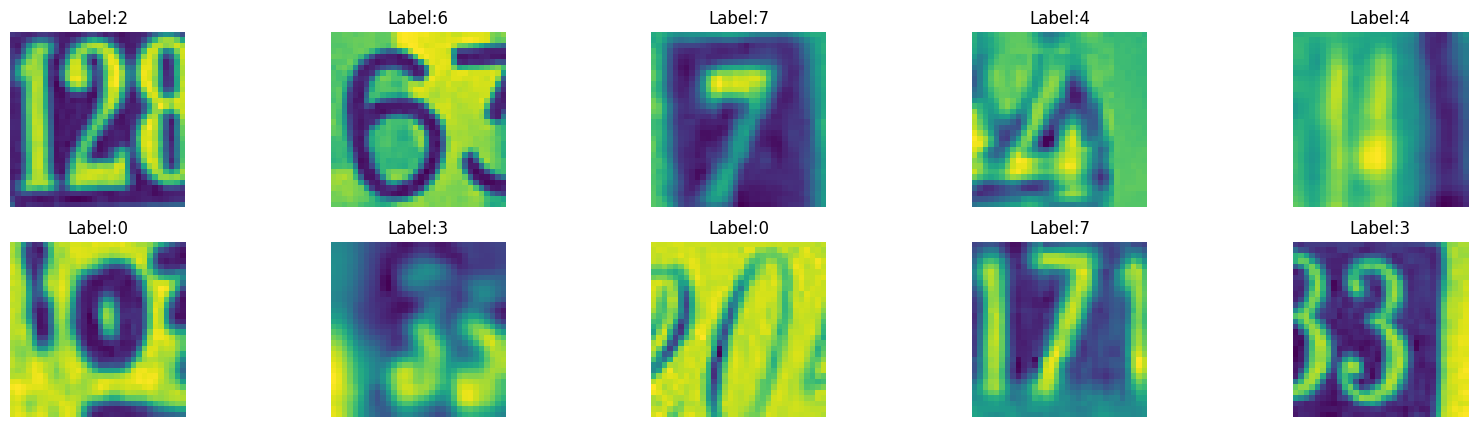

In [ ]:
# Declaring the number of rows
rows = 2
# Declaring the number of columns
cols = 5
# Declaring the figure size
fig = plt.figure(figsize = (20, 5)) #Create the figure only once


# Calling the images to the figure
for i in range(10):
    ax = fig.add_subplot(rows, cols, i + 1)  # Create a subplot within the figure
    ax.imshow(X_train[i])  # Display the image
    ax.set_title(f'Label:{y_train[i]}')  # Set the title
    ax.axis("off")  # Hide axes

# Display the plot
plt.show()


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#Shape and the array of pixels for the first image in the training dataset
print('shape of the array for the first image:\n',X_train[0].shape)
print('array of pixels for the first image:\n',X_train[0])

shape of the array for the first image:
 (32, 32)
array of pixels for the first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
#Normalizing the image data
X_train_normalized = X_train/255.0
X_test_normalized = X_test/255.0
X_val_normalized = X_val/255.0

Print the shapes of Training and Test data

In [ ]:
#New shapes of the train and the test dataset
print('Shape of data variables before flattening:')
print('X_train:', X_train_normalized.shape)
print('X_test:',X_test_normalized.shape)
print('X_val:',X_val_normalized.shape)

X_train_flattened = X_train_normalized.reshape(42000, 1024)
X_test_flattened = X_test_normalized.reshape(18000, 1024)
X_val_flattened = X_val_normalized.reshape(60000, 1024)

# #Shape after flattening
# print('\nShape of data variables after flattening:')
# print('X_train:', X_train_flattened.shape)
# print('X_test:',X_test_flattened.shape)
# print('X_val:',X_val_flattened.shape)

Shape of data variables before flattening:
X_train: (42000, 32, 32)
X_test: (18000, 32, 32)
X_val: (60000, 32, 32)


### **One-hot encode output**

In [ ]:
#One-hot encode the target variable
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)


# print('Shape of target variable after one-hot encoding:')
# print('y_train:',y_train.shape)
# print('y_train_encoded:',y_train_encoded.shape)
# print('y_test_encoded:',y_test_encoded.shape)
# print('y_val_encoded:',y_val_encoded.shape)


**Observation:**






*   The data includes some images of numbers with 32x32 pixels
*   After normalization, the shape of the test and training data became a 3d array
*   Target variable, after one hot encoding became a 2D array






## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
#Clearing previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
#Defining a function for ANN architecture
def nn_model_1():
  #Crete a Sequential Object
  model_1= Sequential()

  #Add first hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
  model_1.add(Dense(64, input_shape = (1024, ), activation = 'relu'))

  #Add second hidden layer with 32 nodes and the relu activation
  model_1.add(Dense(32, activation = 'relu'))

  #Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
  model_1.add(Dense(y_train_encoded.shape[1], activation = 'softmax'))

  #Using optimizer Adam(learning_rate = 0.001)
  opt = Adam(learning_rate = 0.001)

  #Compile the model with the loss equal to categorical_crossentropy, optimizer, and metric equal to 'accuracy'.
  model_1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model_1

In [ ]:
model_1 = nn_model_1()
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Reshape the data to match the expected input shape of the model
#X_train_reshaped = X_train_normalized.reshape(-1, 1024)  # -1 infers the batch size
#X_test_reshaped = X_test_normalized.reshape(-1,1024)


#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20.
#Store the model building history to use later for visualization.
history_1=model_1.fit(   #describe the validation data validatation_data = (X_val, y_val)

    X_train_flattened, y_train_encoded,
    epochs = 20,
    validation_split = 0.2,
    batch_size = 128,
    verbose = 1,
    validation_data=(X_val_flattened, y_val_encoded)

    )



Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.1179 - loss: 2.2999 - val_accuracy: 0.1881 - val_loss: 2.1862
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2520 - loss: 2.0815 - val_accuracy: 0.3623 - val_loss: 1.8384
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3914 - loss: 1.7767 - val_accuracy: 0.4519 - val_loss: 1.6469
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4664 - loss: 1.6141 - val_accuracy: 0.5027 - val_loss: 1.5211
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5087 - loss: 1.4994 - val_accuracy: 0.5413 - val_loss: 1.4077
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5459 - loss: 1.3973 - val_accuracy: 0.5649 - val_loss: 1.3463
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5647 - loss: 1.3445 - val_accuracy: 0.5796 - val_loss: 1.3062
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5778 - loss: 1.3121 - val_accuracy

### **Plot the Training and Validation Accuracies and write down your Observations.**

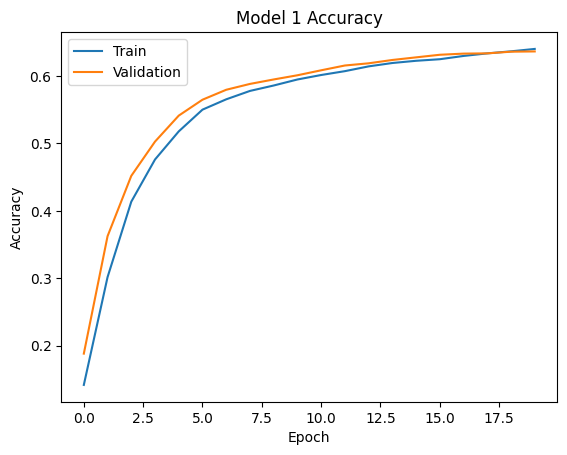

In [ ]:
plt.plot(history_1.history['accuracy'])

plt.plot(history_1.history['val_accuracy'])

plt.title('Model 1 Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()


**Observations:**  
*    The training accuracy increases steadily and reaches approximately 0.64 by the end of the 20 epochs. The validation accuracy also increases and plateaus around 0.63 after approximately 15 epochs.
*    The validation accuracy is slightly higher. Around 15 epochs, the validation data appears to be getting stable, while the training data accuracy is increasing. The model has relatively small gap between training and validation accuracy, which may indicate overfitting is not an issue here, but its overall performance is a bit low.







Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()


#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
#Defining a function for ANN architecture
def nn_model_2():
  #Crete a Sequential Object
  model_2 = Sequential()

  #Add first hidden layer with 256 nodes and the relu activation and the input shape = (1024, )
  model_2.add(Dense(256, input_shape = (1024, ), activation = 'relu'))

  #Add second hidden layer with 128 nodes and the relu activation
  model_2.add(Dense(128, activation = 'relu'))

  #Add the Dropout layer with the rate equal to 0.2
  model_2.add(Dropout(0.2))

  #Fourth hidden layer with 64 nodes and the relu activation
  model_2.add(Dense(64, activation = 'relu'))

  #Fifth hidden layer with 32 nodes and the relu activation
  model_2.add(Dense(32, activation = 'relu'))

  #Add the BatchNormalization layer
  model_2.add(BatchNormalization())

  #Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
  model_2.add(Dense(y_train_encoded.shape[1], activation = 'softmax'))

  #Using optimizer Adam(learning_rate = 0.0005)
  opt = Adam(learning_rate = 0.0005)

  #Compile the model with the loss equal to categorical_crossentropy, optimizer, and metric equal to 'accuracy'.
  model_2.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model_2

In [ ]:
model_2=nn_model_2()
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 306,090 (1.17 MB)

 Trainable params: 306,026 (1.17 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
#Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
#Store the model building history to use later for visualization.
history_2=model_2.fit(

    X_train_flattened, y_train_encoded,
    epochs = 30,
    validation_split = 0.2,
    batch_size = 128,
    verbose = 1,
    validation_data=(X_val_flattened, y_val_encoded)

    )



Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.1003 - loss: 2.3998 - val_accuracy: 0.1224 - val_loss: 2.2965
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1662 - loss: 2.2076 - val_accuracy: 0.3606 - val_loss: 1.8283
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4480 - loss: 1.6100 - val_accuracy: 0.5712 - val_loss: 1.3226
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5669 - loss: 1.3288 - val_accuracy: 0.6277 - val_loss: 1.1489
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6141 - loss: 1.2005 - val_accuracy: 0.6364 - val_loss: 1.1214
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6417 - loss: 1.1216 - val_accuracy: 0.6735 - val_loss: 1.0179
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6643 - loss: 1.0570 - val_accuracy: 0.6531 - val_loss: 1.0610
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6646 - loss: 1.0470 - val_accuracy: 

### **Plot the Training and Validation Accuracies and write down your Observations.**

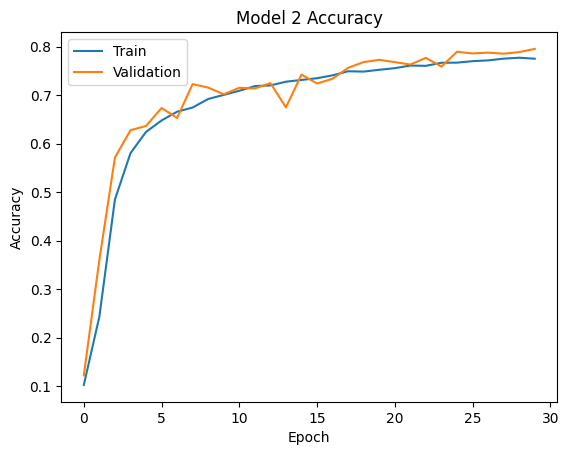

In [ ]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Model 2 Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:**
*    The training increases significantly and reaches around 0.78 by the end of the 30 epochs.
*    The validation accuracy also increases and appears to fluctuate but generally plateaus around 0.78-0.79 towards the end of training.

*   In comparison, Model 2 shows significantly higher training and validation accuracy compared to Model 1. Model 2 achieves a validation accuracy of around 0.78-0.79, while Model 1 plateaued at around 0.63. Similar to Model 1, accuracies of both training and validation are close overall. Therefore Model 2 is a better model between the two.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
#Make predictions on the test set using the second model.
y_pred_test = model_2.predict(X_test_flattened)


563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#Convert the probabilities into class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1814
           1       0.85      0.73      0.78      1828
           2       0.72      0.83      0.77      1803
           3       0.70      0.75      0.72      1719
           4       0.78      0.83      0.80      1812
           5       0.74      0.76      0.75      1768
           6       0.82      0.76      0.79      1832
           7       0.77      0.85      0.81      1808
           8       0.79      0.71      0.75      1812
           9       0.80      0.75      0.77      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



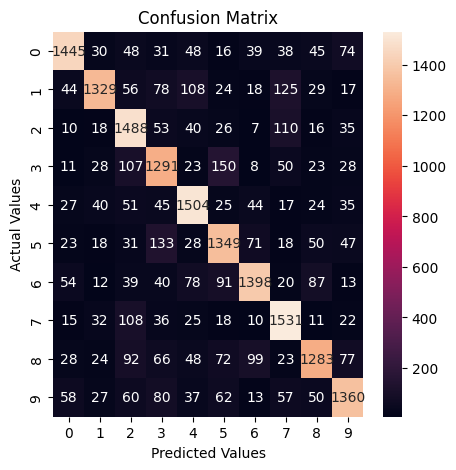

In [ ]:
# Importing required functions
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

#Ploting the heatmap from the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**Final Observations:**


*   The model accuracy on test data is 0.78 which aligns with the accuracy plot observations.
*   Variation in precision is between 0.70 and 0.85. This shows that the model sometimes falsely predict some numbers. Classes 2, 3 and 5 has the lowest precision values. Recall results between 0.71 and 0.85. F1-score ranges between 0.72 and 0.82.
*   Based on the confusion matrix, some specific misclassifications can be identified. Notable confusions are between:
  * Class 1 and Class 7
  * Class 2 and Class 7
  * Class 3 and Class 5
  * Class 8 and Class 9


*   Model 2 performs reasonably well overall with an accuracy of 78%.
The performance across different classes is relatively consistent, with precision and recall values generally above 0.70.



## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
#Load the dataset again
f_cnn = h5py.File('/content/drive/MyDrive/Great Learning x MIT/Deep Learning/Case Studies/Projects- SVHN Digit Recognition/SVHN Grey Data.h5', 'r')

#Split the data into the train and the test dataset
X_train_cnn = np.array(f_cnn["X_train"])
y_train_cnn = np.array(f_cnn["y_train"])

X_val_cnn = np.array(f_cnn["X_val"])
y_val_cnn = np.array(f_cnn["y_val"])

X_test_cnn = np.array(f_cnn["X_test"])
y_test_cnn = np.array(f_cnn["y_test"])

Check the number of images in the training and the testing dataset.

In [ ]:
#Check the number of images in the training and the testing dataset
print('training data shape:',X_train_cnn.shape)
print('validation data shape:',X_val_cnn.shape)
print('testing data shape:',X_test_cnn.shape)


training data shape: (42000, 32, 32)
validation data shape: (60000, 32, 32)
testing data shape: (18000, 32, 32)


**Observation:**
The training data has 42000 images, validation data has 60000 and testing data has 18000 images. The images are 32x32 pixels.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#Shape and the array of pixels for the first image in the training dataset
print('shape of pixels for first image:\n',X_train_cnn[0].shape,'\n\n',
'array of pixels for first image:\n',X_train_cnn[0])


shape of pixels for first image:
 (32, 32) 

 array of pixels for first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape the data to match the expected input shape of the model
X_train_cnn_reshaped = X_train_cnn.reshape(len(X_train_cnn),32,32,1)  #1 is added as the 5th dimension
X_val_cnn_reshaped = X_val_cnn.reshape(len(X_val_cnn),32,32,1)
X_test_cnn_reshaped = X_test_cnn.reshape(len(X_test_cnn),32,32,1)

Normalize inputs from 0-255 to 0-1

In [ ]:
#Normalizing inputs by dividing by 255
X_train_cnn_normalized= X_train_cnn_reshaped/255.0
X_val_cnn_normalized= X_val_cnn_reshaped/255.0
X_test_cnn_normalized= X_test_cnn_reshaped/255.0

Print New shape of Training and Test

In [ ]:
#Checking shape of normalized data
print('shape of normalized training data:\n',X_train_cnn_normalized.shape)
print('shape of normalized validation data:\n',X_val_cnn_normalized.shape)
print('shape of normalized testing data:\n',X_test_cnn_normalized.shape)

shape of normalized training data:
 (42000, 32, 32, 1)
shape of normalized validation data:
 (60000, 32, 32, 1)
shape of normalized testing data:
 (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
#One-hot encoding the labels
y_train_cnn_encoded = to_categorical(y_train_cnn)
y_val_cnn_encoded = to_categorical(y_val_cnn)
y_test_cnn_encoded = to_categorical(y_test_cnn)

print('training labels:',y_train_cnn_encoded)
print('shape of training label array:',y_train_cnn_encoded.shape)

training labels: [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of training label array: (42000, 10)


**Observation:** The original arrays are 3D, showing the images are grayscale. They are reshaped into 4D by addition of 1.
The label data(target variables) are kept at the same size which is 2D.






## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
#Clearing previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Defininf the function cnn_model_1
def cnn_model_1():
  # Initialized a sequential model
  model_3 = Sequential()

  # First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
  model_3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (32, 32, 1)))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model_3.add(LeakyReLU(0.1))

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))

  # Another LeakyRelu with the slope equal to 0.1
  model_3.add(LeakyReLU(0.1))

  # A max-pooling layer with a pool size of 2x2
  model_3.add(MaxPooling2D(pool_size = (2, 2)))

  # Flatten the output from the previous layer
  model_3.add(Flatten())

  # Add a dense layer with 32 nodes
  model_3.add(Dense(32))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model_3.add(LeakyReLU(0.1))

  # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  model_3.add(Dense(y_train_encoded.shape[1], activation = 'softmax'))

  # Optimizer equal to Adam(learning_rate = 0.001)
  opt= Adam(learning_rate = 0.001)

  # Compile the model with the loss equal to categorical_crossentropy, optimizer and metric equal to 'accuracy'. Do not fit the model here, just return the compiled model.
  model_3.compile(opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model_3


In [ ]:
#Print the summary of the model
model_3=cnn_model_1()
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         262,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20
# Store the model building history to use later for visualization
history_3=model_3.fit(

    X_train_cnn_normalized, y_train_cnn_encoded,
    epochs = 20,
    validation_split = 0.2,
    batch_size = 32,
    verbose = 1,
    validation_data=(X_val_cnn_normalized, y_val_cnn_encoded)

    )

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4578 - loss: 1.5620 - val_accuracy: 0.8302 - val_loss: 0.5922
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8354 - loss: 0.5651 - val_accuracy: 0.8636 - val_loss: 0.4775
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8637 - loss: 0.4594 - val_accuracy: 0.8781 - val_loss: 0.4186
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8851 - loss: 0.3917 - val_accuracy: 0.8864 - val_loss: 0.3865
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9010 - loss: 0.3431 - val_accuracy: 0.8941 - val_loss: 0.3599
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9112 - loss: 0.3026 - val_accuracy: 0.9013 - val_loss: 0.3414
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9228 - loss: 0.2670 - val_accuracy: 0.9059 - val_loss: 0.3307
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9318 - loss: 0.23

### **Plot the Training and Validation Accuracies and Write your observations.**

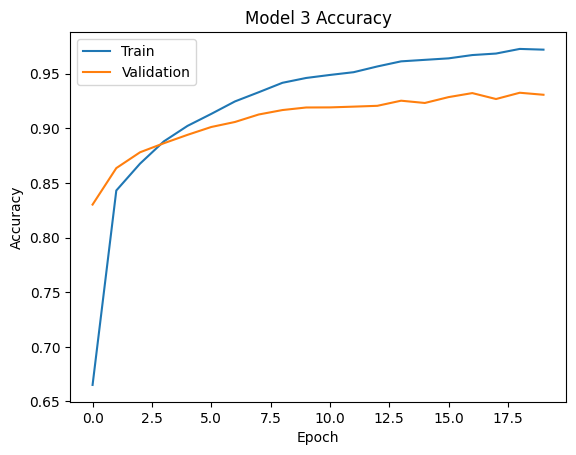

In [ ]:
plt.plot(history_3.history['accuracy'])

plt.plot(history_3.history['val_accuracy'])

plt.title('Model 3 Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:**


*   Training accuracy increases and reaches a very high value, around 0.98 by the end of the 20 epochs. The validation accuracy also increases but plateaus around 0.93 after about 15 epochs, with some fluctuation.
*   Model has larger gap between training and validation accuracy, which might indicate some overfitting.
*   In comparison to previous models, Model 3 shows significantly higher training and validation accuracy compared to both Model 1 and Model 2, but also has the overfitting signs.



Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#Clearing previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_2():
  # Initialized a sequential model
  model_4 = Sequential()

  # First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
  model_4.add(Conv2D(filters = 16, kernel_size =(3,3), padding = "same", input_shape = (32, 32, 1)))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model_4.add(LeakyReLU(0.1))

  # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model_4.add(Conv2D(filters = 32,kernel_size = (3,3), padding = "same"))

  # Add LeakyRelu with the slope equal to 0.1
  model_4.add(LeakyReLU(0.1))

  # Add a max-pooling layer with a pool size of 2x2
  model_4.add(MaxPooling2D(pool_size = (2, 2)))

  # Add a BatchNormalization layer
  model_4.add(BatchNormalization())

  # Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
  model_4.add(Conv2D(filters = 32,kernel_size = (3,3), padding = "same"))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model_4.add(LeakyReLU(0.1))

  # Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
  model_4.add(Conv2D(filters = 64, kernel_size =(3,3), padding = "same"))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model_4.add(LeakyReLU(0.1))

  # Add a max-pooling layer with a pool size of 2x2
  model_4.add(MaxPooling2D(pool_size = (2, 2)))

  # Add a BatchNormalization layer
  model_4.add(BatchNormalization())

  # Flatten the output from the previous layer
  model_4.add(Flatten())

  # Add a dense layer with 32 nodes
  model_4.add(Dense(32))

  # Add a LeakyRelu layer with the slope equal to 0.1
  model_4.add(LeakyReLU(0.1))

  # Add a dropout layer with the rate equal to 0.5
  model_4.add(Dropout(0.5))

  # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
  model_4.add(Dense(y_train_encoded.shape[1],activation = 'softmax'))

  # Adam optimizers (learning_rate = 0.001)
  opt = Adam(learning_rate = 0.001)

  # Compile the model with the categorical_crossentropy loss, optimizer and metric equal to 'accuracy'
  model_4.compile(opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model_4

In [ ]:
#Print the summary of the model
model_4=cnn_model_2()
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         131,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30
# Store the model building history to use later for visualization.

history_4=model_4.fit(
    X_train_cnn_normalized, y_train_cnn_encoded,
    epochs = 30,
    validation_split = 0.2,
    batch_size = 128,
    verbose = 1,
    validation_data=(X_val_cnn_normalized, y_val_cnn_encoded)
)


Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.4001 - loss: 1.7493 - val_accuracy: 0.4401 - val_loss: 1.7859
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7863 - loss: 0.7001 - val_accuracy: 0.8778 - val_loss: 0.4442
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8338 - loss: 0.5677 - val_accuracy: 0.8939 - val_loss: 0.3666
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8528 - loss: 0.4941 - val_accuracy: 0.8998 - val_loss: 0.3467
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8680 - loss: 0.4465 - val_accuracy: 0.9093 - val_loss: 0.3121
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8754 - loss: 0.4157 - val_accuracy: 0.9140 - val_loss: 0.2905
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8849 - loss: 0.3885 - val_accuracy: 0.9187 - val_loss: 0.2775
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8907 - loss: 0.3609 - val_ac

### **Plot the Training and Validation accuracies and write your observations.**

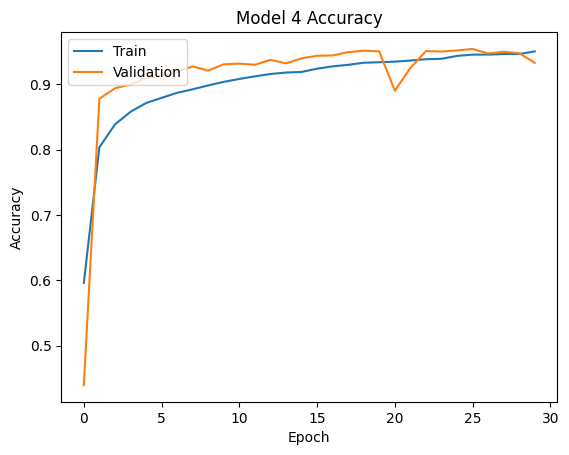

In [ ]:
plt.plot(history_4.history['accuracy'])

plt.plot(history_4.history['val_accuracy'])

plt.title('Model 4 Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:**


*   The training accuracy increases and reaches around 0.95 by the end of the 30 epochs. The validation accuracy increases and plateaus around 0.94-0.95 towards the end of training, showing some slight fluctuations.
*   Model also shows a gap between training and validation, but it seems significantly less than in Model 3.



## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
#Make predictions on the test set using the second model.
y_pred_test_cnn = model_4.predict(X_test_cnn_normalized)


563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#Convert the probabilities into class labels
y_pred_test_classes_cnn = np.argmax(y_pred_test_cnn, axis = 1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1814
           1       0.91      0.88      0.90      1828
           2       0.91      0.91      0.91      1803
           3       0.87      0.86      0.87      1719
           4       0.85      0.95      0.90      1812
           5       0.87      0.91      0.89      1768
           6       0.90      0.86      0.88      1832
           7       0.90      0.92      0.91      1808
           8       0.90      0.87      0.89      1812
           9       0.90      0.90      0.90      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



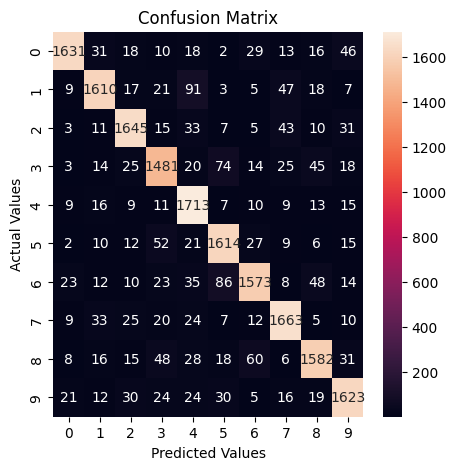

In [ ]:
# Printing the classification report
print(classification_report(y_test_cnn, y_pred_test_classes_cnn))

#Ploting the heatmap from the confusion matrix
cm = confusion_matrix(y_test_cnn, y_pred_test_classes_cnn)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

**Observations:**
*   Overall Accuracy for model 4 is 0.92. This is a significant improvement compared to Model 2's accuracy of 0.78.
*  Precision, Recall and F1-scores are also improved compared to Model 2.
*  On the confusion matrix, diagonal elements are larger in Model 4's confusion matrix, indicating more correct classifications. For example, 1650 images of class 0 were correctly predicted by Model 4, compared to 1445 by Model 2. The off-diagonal elements, representing misclassifications, are generally  smaller in Model 4's matrix.


**Final Observations:**
* The accuracy information for all four models are as below based on peak validation accuracies:

  * Model 1 (ANN): Validation accuracy around 63%
  * Model 2 (ANN): Validation accuracy around 78%
  * Model 3 (CNN): Validation accuracy around 93%
  * Model 4 (CNN): Validation accuracy around 94%

* In addition, the classification reports and confusion matrices confirm that Model 4 (your CNN model) is significantly better than Model 2 (your ANN model) for this digit recognition task.

* The improvement in overall accuracy, precision, recall, and the reduction in misclassifications across all classes shows the effectiveness of the CNN architecture in learning and generalizing from image data. The observations can be explained by CNNs ability to automatically learn hierarchical spatial features dur to their architectures.

* Based on all the observations, Model 4 is the best model among the four models.
